In [2]:
from sklearn.datasets import fetch_california_housing


In [3]:
cali = fetch_california_housing()
print(cali.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
import pandas as pd
import numpy as np

cali_df = pd.DataFrame(cali.data)
cali_df.columns = cali.feature_names
cali_df['Price'] = cali.target
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


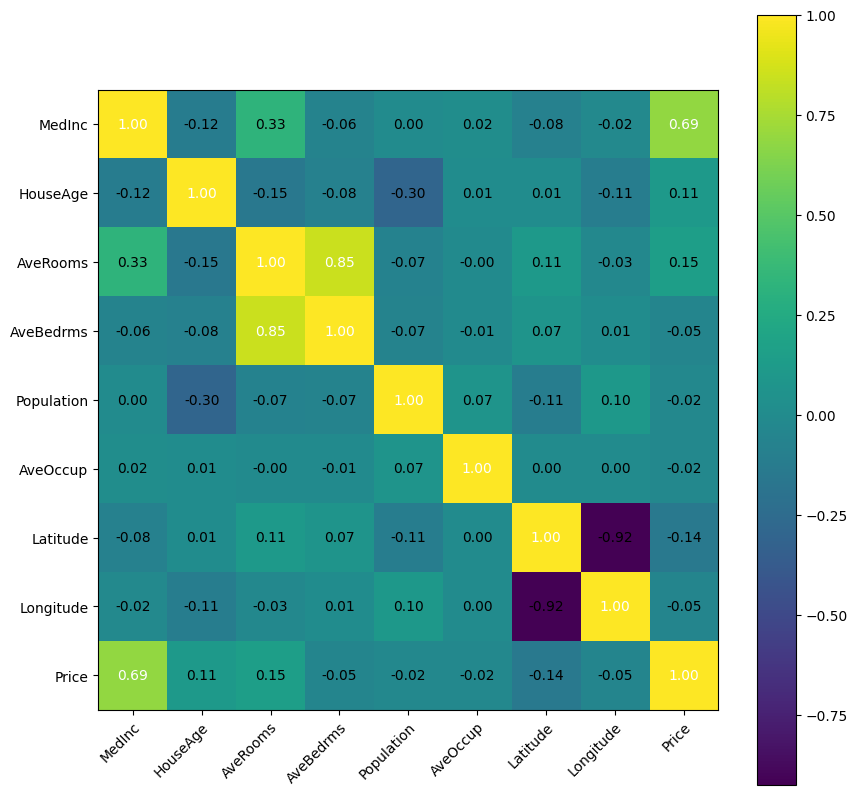

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.plotting import heatmap

cols = cali_df.columns

cm = np.corrcoef(cali_df[cols].values.T)
hm = heatmap(cm,figsize=(10,10),row_names=cols,column_names=cols)
plt.show()

In [20]:
from scipy import stats

'''for col in cols:
    rho,p = stats.spearmanr(cali_df[cols].values,cali_df['Price'].values)
    print('Spearman correlation between PRICE and %s is %s' %(col, np.round(rho, 4)))'''
for col in cols[:-1]:
    rho, p = stats.spearmanr(cali_df[col].values, cali_df['Price'].values)
    print('Spearman correlation between PRICE and %s is %s' %(col, round(rho,4)))

Spearman correlation between PRICE and MedInc is 0.6768
Spearman correlation between PRICE and HouseAge is 0.0749
Spearman correlation between PRICE and AveRooms is 0.2634
Spearman correlation between PRICE and AveBedrms is -0.1252
Spearman correlation between PRICE and Population is 0.0038
Spearman correlation between PRICE and AveOccup is -0.2566
Spearman correlation between PRICE and Latitude is -0.1657
Spearman correlation between PRICE and Longitude is -0.0697


In [21]:
X = cali_df[['MedInc']]
y = cali_df.Price

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [24]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

r2_train = reg.score(X_train,y_train)
print('R^2 score for train dataset = ', round(r2_train, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.4699 

Coefficients of Linear Model: [0.41947933] 

Intercept: 0.45070114392925387


In [26]:
y_pred = reg.predict(X_test)
y_pred[:10]

array([1.95734506, 1.6906401 , 1.82898439, 1.73296557, 1.8541112 ,
       2.19791646, 2.16897239, 3.6574948 , 1.71039758, 2.14359389])

In [27]:
r2_test = reg.score(X_test, y_test)
print('R^2 score for test dataset = ', round(r2_test, 4), '\n')

R^2 score for test dataset =  0.4817 



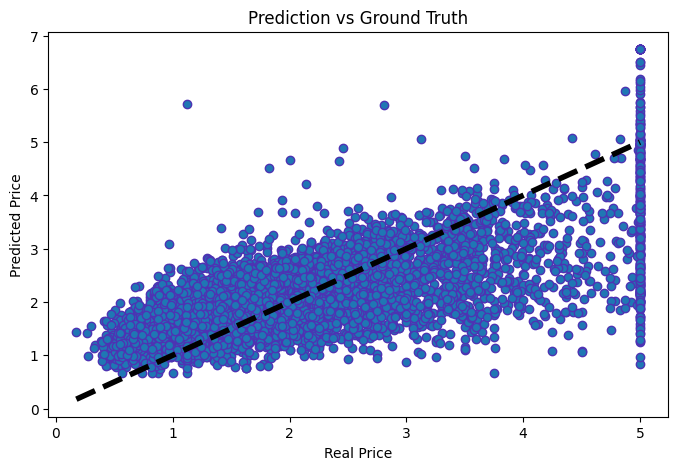

In [29]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(y_test, y_pred, edgecolors=(0.3, 0.2, 0.7)) 
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Real Price')
ax.set_ylabel('Predicted Price')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

In [31]:
pip install --upgrade --no-deps statsmodels


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 30.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install patsy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 4.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
import statsmodels.api as sm

In [35]:
XC_train = sm.add_constant(X_train)
model = sm.OLS(y_train, XC_train)
results = model.fit()
print('Summary:\n', results.summary())

Summary:
                             OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                 1.281e+04
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:29:57   Log-Likelihood:                -18052.
No. Observations:               14448   AIC:                         3.611e+04
Df Residuals:                   14446   BIC:                         3.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4507      0.016     28.20